This is for Figure 2(b).

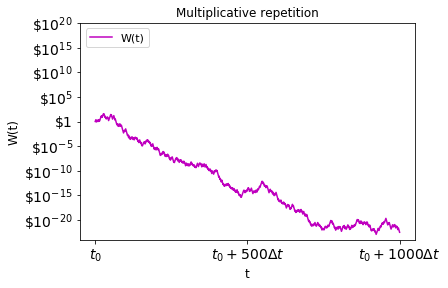

In [20]:
import matplotlib
import matplotlib.pyplot as pyplot
import numpy
import random

# In the beginning, we only have $1.
magenta = [1]
N = 1000

# Then we do multiplicative repetition for 1,000 times.
for i in range(1, N+1):
    # 50% chance of 0.6x what we had before, or
    # 50% chance of 1.5x what we had before.
    magenta.append(magenta[i-1] * random.choice([0.6, 1.5]))

# Plotting time.
x = numpy.arange(N+1)
y = numpy.log10(magenta)
pyplot.plot(x, y, 'm-', label='W(t)')

pyplot.xlabel('t', fontsize=12)
xticks = [0, 500, 1000]
xlabels = ['$t_{0}$', '$t_{0}+500 \Delta t$',  '$t_{0}+1000 \Delta t$']
pyplot.xticks(xticks, xlabels, fontsize=14)

pyplot.ylabel('W(t)', fontsize=12)
yticks = [20, 15, 10, 5, 0, -5, -10, -15, -20]
ylabels = ['\$$10^{20}$', '\$$10^{15}$', '\$$10^{10}$', '\$$10^{5}$',
           '\$1',
           '\$$10^{-5}$', '\$$10^{-10}$', '\$$10^{-15}$', '\$$10^{-20}$']
pyplot.yticks(yticks, ylabels, fontsize=14)

pyplot.legend(loc='upper left', fontsize=11)
pyplot.title('Multiplicative repetition')
pyplot.show()